<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Genomes" data-toc-modified-id="Genomes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Genomes</a></span></li><li><span><a href="#Antismash" data-toc-modified-id="Antismash-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Antismash</a></span><ul class="toc-item"><li><span><a href="#Re-running-failed-jobs" data-toc-modified-id="Re-running-failed-jobs-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Re-running failed jobs</a></span></li><li><span><a href="#Re-running-failed-jobs" data-toc-modified-id="Re-running-failed-jobs-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Re-running failed jobs</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Totals" data-toc-modified-id="Totals-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Totals</a></span></li><li><span><a href="#by-taxonomy" data-toc-modified-id="by-taxonomy-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>by taxonomy</a></span><ul class="toc-item"><li><span><a href="#Firmicutes" data-toc-modified-id="Firmicutes-7.0.2.1"><span class="toc-item-num">7.0.2.1&nbsp;&nbsp;</span>Firmicutes</a></span></li></ul></li><li><span><a href="#By-taxonomy;-ave-per-genome" data-toc-modified-id="By-taxonomy;-ave-per-genome-7.0.3"><span class="toc-item-num">7.0.3&nbsp;&nbsp;</span>By taxonomy; ave per genome</a></span><ul class="toc-item"><li><span><a href="#Highest-average-per-genome" data-toc-modified-id="Highest-average-per-genome-7.0.3.1"><span class="toc-item-num">7.0.3.1&nbsp;&nbsp;</span>Highest average per genome</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#DeepBGC" data-toc-modified-id="DeepBGC-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>DeepBGC</a></span><ul class="toc-item"><li><span><a href="#First-run" data-toc-modified-id="First-run-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>First run</a></span></li></ul></li><li><span><a href="#--WAITING--" data-toc-modified-id="--WAITING---9"><span class="toc-item-num">9&nbsp;&nbsp;</span>--WAITING--</a></span><ul class="toc-item"><li><span><a href="#Re-run-failed-jobs" data-toc-modified-id="Re-run-failed-jobs-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Re-run failed jobs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-9.1.0.1"><span class="toc-item-num">9.1.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Stats" data-toc-modified-id="Stats-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Stats</a></span></li><li><span><a href="#RF-scores-for-each-product" data-toc-modified-id="RF-scores-for-each-product-9.2.3"><span class="toc-item-num">9.2.3&nbsp;&nbsp;</span>RF scores for each product</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

# Goal

* Identify putative biosynthetic gene clusters in species-rep MAGs

# Var

In [4]:
# Dereplicated MAGs
MAG_dir = file.path('/ebio', 'abt3_projects', 'Georg_animal_feces', 'data',
                     'metagenome', 'multi-study', 'BioProjects', 'summary',
                     'LLMGA', 'wGeorgAnimal', 'drep-0.995')

# de-rep'd MAG metadata
MAG_meta_file = file.path(MAG_dir, 'drep-MAG_metadata.tsv')

# working dir
work_dir = file.path(MAG_dir, 'BGCs')


# params
conda_env = 'BGC'
threads = 8
workers = 100

# Init

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(doParallel)

library(future)
library(future.batchtools)
library(future.apply)
options(future.wait.interval = 2.0)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [7]:
make_dir(work_dir)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs 


# Genomes

In [8]:
# genome fasta filesvv
genome_files = list.files(file.path(MAG_dir, 'dereplicated_genomes'), '*.fa', full.names=TRUE)
genome_files = data.frame(fasta_file = genome_files,
                          base_in = basename(genome_files)) %>%
    mutate(binID = gsub('\\.fa$', '', base_in),
           taxon = gsub('\\.contigs\\.fa$', '', base_in),
           taxon = gsub('\\.', '_', taxon),
           AS_out_dir = file.path(work_dir, 'antismash_v5', taxon),
           dBGC_out_dir = file.path(work_dir, 'deepBGC', taxon))

genome_files %>% dfhead

[1] 3557    6


fasta_file,base_in,binID,taxon,AS_out_dir,dBGC_out_dir
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,artificially_reared_1__metabat2_low_PE.001.contigs.fa,artificially_reared_1__metabat2_low_PE.001.contigs,artificially_reared_1__metabat2_low_PE_001,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_001,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_001
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,artificially_reared_1__metabat2_low_PE.002.contigs.fa,artificially_reared_1__metabat2_low_PE.002.contigs,artificially_reared_1__metabat2_low_PE_002,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs,artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006


In [10]:
# metadata
MAG_meta = read.delim(MAG_meta_file, sep='\t')
MAG_meta %>% dfhead

[1] 3557   56


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
artificially_reared_1__metabat2_low_PE.001.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,o__Bacteroidales (UID2657),160,491,268,87.24,4.15,45.00,2455242,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A plebeius,94.69,0.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,ANI,topological placement and ANI have incongruent species assignments,80.20,11,N/A,N/A
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A


In [11]:
# table join
genome_files = genome_files %>%
    inner_join(MAG_meta, c('binID')) 

genome_files %>% dfhead

Warning message:
“Column `binID` joining character vector and factor, coercing into character vector”

[1] 3557   61


fasta_file,base_in,binID,taxon,AS_out_dir,dBGC_out_dir,fasta.x,Marker.lineage,X..genomes,X..markers,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,artificially_reared_1__metabat2_low_PE.001.contigs.fa,artificially_reared_1__metabat2_low_PE.001.contigs,artificially_reared_1__metabat2_low_PE_001,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_001,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_001,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,o__Bacteroidales (UID2657),160,491,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A plebeius,94.69,0.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,ANI,topological placement and ANI have incongruent species assignments,80.20,11,N/A,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,artificially_reared_1__metabat2_low_PE.002.contigs.fa,artificially_reared_1__metabat2_low_PE.002.contigs,artificially_reared_1__metabat2_low_PE_002,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs,artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A


# Antismash

In [12]:
D = file.path(work_dir, 'antismash_v5')
make_dir(D)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5 


In [13]:
antismash_cmd = function(in_file, out_dir, cpus=8){
    params = '--cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal'
    exe_path = '--executable-paths meme=/ebio/abt3_projects/software/bin/meme'
    db = '--databases /ebio/abt3_projects/databases_no-backup/antismash/v5/'
    cmd = 'antismash --cpus {cpus} {params} {exe_path} {db} --output-dir {out_dir} {in_file}'
    cmd = glue::glue(cmd, cpus=8, params=params, exe_path=exe_path, 
                     db=db, out_dir=out_dir, in_file=in_file)
    return(cmd)
}

cmds = mapply(antismash_cmd, genome_files$fasta_file, genome_files$AS_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 3557


[1] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_001 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa"
[2] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa"

In [14]:
resources = list(h_rt = '00:59:00',
                 h_vmem = '4G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [ ]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

## Re-running failed jobs

In [17]:
# directories with output
complete = list.files(file.path(work_dir, 'antismash_v5'), 'index.html', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)
complete %>% length %>% print

[1] 1277


In [18]:
# redo genomes
genome_files_f = genome_files %>%
    filter(!AS_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 2280   61


fasta_file,base_in,binID,taxon,AS_out_dir,dBGC_out_dir,fasta.x,Marker.lineage,X..genomes,X..markers,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_high_PE.029.contigs.fa,Ash_p2__metabat2_high_PE.029.contigs.fa,Ash_p2__metabat2_high_PE.029.contigs,Ash_p2__metabat2_high_PE_029,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Ash_p2__metabat2_high_PE_029,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Ash_p2__metabat2_high_PE_029,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_high_PE.029.contigs.fa,k__Bacteria (UID2372),131,177,⋯,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Allobaculum;s__Allobaculum stercoricanis,77.86,0.09,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__;s__,Placement,taxonomic novelty determined using RED,95.46,11,0.975156360167,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_low_PE.037.contigs.fa,Ash_p2__metabat2_low_PE.037.contigs.fa,Ash_p2__metabat2_low_PE.037.contigs,Ash_p2__metabat2_low_PE_037,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Ash_p2__metabat2_low_PE_037,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Ash_p2__metabat2_low_PE_037,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_low_PE.037.contigs.fa,o__Clostridiales (UID1212),172,263,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Negativibacillus;s__Negativibacillus sp000435195,97.34,0.94,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Negativibacillus;s__,ANI/Placement,topological placement and ANI have congruent species assignments,65.87,11,N/A,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Avalanche_p1__maxbin2_low_prob.005.contigs.fa,Avalanche_p1__maxbin2_low_prob.005.contigs.fa,Avalanche_p1__maxbin2_low_prob.005.contigs,Avalanche_p1__maxbin2_low_prob_005,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Avalanche_p1__maxbin2_low_prob_005,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Avalanche_p1__maxbin2_low_prob_005,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Avalanche_p1__maxbin2_low_prob.005.contigs.fa,k__Bacteria (UID2329),174,149,⋯,N/A,N/A,N/A,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium_A;s__,Placement,taxonomic classification fully defined by topology,69.37,11,0.936370284294,N/A


In [19]:
cmds = mapply(antismash_cmd, genome_files_f$fasta_file, genome_files_f$AS_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 2280


[1] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Ash_p2__metabat2_high_PE_029 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_high_PE.029.contigs.fa"
[2] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Ash_p2__metabat2_low_PE_037 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Ash_p2__metabat2_low_PE.037.contigs.fa"

In [21]:
resources = list(h_rt = '08:00:00',
                 h_vmem = '6G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [22]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 2280

## Re-running failed jobs

In [24]:
# directories with output
complete = list.files(file.path(work_dir, 'antismash_v5'), 'index.html', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)
complete %>% length %>% print

[1] 3503


In [25]:
# redo genomes
genome_files_f = genome_files %>%
    filter(!AS_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 54 61


fasta_file,base_in,binID,taxon,AS_out_dir,dBGC_out_dir,fasta.x,Marker.lineage,X..genomes,X..markers,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Bissell_p2__maxbin2_low_prob.017.contigs.fa,Bissell_p2__maxbin2_low_prob.017.contigs.fa,Bissell_p2__maxbin2_low_prob.017.contigs,Bissell_p2__maxbin2_low_prob_017,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Bissell_p2__maxbin2_low_prob_017,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Bissell_p2__maxbin2_low_prob_017,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Bissell_p2__maxbin2_low_prob.017.contigs.fa,f__Lachnospiraceae (UID1256),33,333,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Faecalicatena;s__Faecalicatena gnavus,97.52,0.92,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Faecalicatena;s__,ANI/Placement,topological placement and ANI have congruent species assignments,90.83,11,N/A,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob.008.contigs.fa,Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob.008.contigs.fa,Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob.008.contigs,Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob_008,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob_008,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob_008,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob.008.contigs.fa,p__Firmicutes (UID1022),100,295,⋯,N/A,N/A,N/A,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Megamonas;s__,Placement,taxonomic classification fully defined by topology,98.63,11,0.948960592053,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Cobain_p1__metabat2_high_PE.039.contigs.fa,Cobain_p1__metabat2_high_PE.039.contigs.fa,Cobain_p1__metabat2_high_PE.039.contigs,Cobain_p1__metabat2_high_PE_039,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Cobain_p1__metabat2_high_PE_039,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/Cobain_p1__metabat2_high_PE_039,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Cobain_p1__metabat2_high_PE.039.contigs.fa,o__Clostridiales (UID1226),155,278,⋯,N/A,N/A,N/A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__,Placement,taxonomic classification fully defined by topology,80.22,11,0.925889103135,N/A


In [26]:
cmds = mapply(antismash_cmd, genome_files_f$fasta_file, genome_files_f$AS_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 54


[1] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Bissell_p2__maxbin2_low_prob_017 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Bissell_p2__maxbin2_low_prob.017.contigs.fa"                                                                  
[2] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob_008 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR098__maxbin2_low_prob.008.contigs.fa"

In [29]:
resources = list(h_rt = '24:00:00',
                 h_vmem = '8G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [30]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 54

# Summary

In [34]:
# getting products for all gbk "region" files
cmd = "find {dir} -name '*region*.gbk' | xargs grep 'product=' | sort -u | perl -pe 's/gbk: +/gbk:\t/g'"
cmd = glue::glue(cmd, dir=file.path(work_dir, 'antismash_v5'))
ret = bash_job(cmd, conda_env=conda_env)
ret %>% length

[1] 3751

In [35]:
# formatting
x = ret %>% strsplit('\t') %>% unlist
products = data.frame(gbk_file = gsub(':$', '', x[1:length(x) %% 2 == 1]),
                      product = gsub('/product=|"', '', x[1:length(x) %% 2 == 0])) %>%
    mutate(taxon = sapply(gbk_file, function(x) basename(dirname(as.character(x)))),
           product = product %>% as.character)

products %>% dfhead

[1] 3751    3


gbk_file,product,taxon
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00016_artific...region001.gbk,arylpolyene,artificially_reared_2__maxbin2_low_prob_006
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00086_artific...region001.gbk,arylpolyene,artificially_reared_2__maxbin2_low_prob_006
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_017/c00005_artific...region001.gbk,bacteriocin,artificially_reared_2__metabat2_low_PE_017


In [36]:
# joining with metadata
products = products %>%
    inner_join(genome_files, c('taxon')) 

products %>% dfhead

[1] 3751   63


gbk_file,product,taxon,fasta_file,base_in,binID,AS_out_dir,dBGC_out_dir,fasta.x,Marker.lineage,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00016_artific...region001.gbk,arylpolyene,artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00086_artific...region001.gbk,arylpolyene,artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs.fa,artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A
/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_017/c00005_artific...region001.gbk,bacteriocin,artificially_reared_2__metabat2_low_PE_017,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.017.contigs.fa,artificially_reared_2__metabat2_low_PE.017.contigs.fa,artificially_reared_2__metabat2_low_PE.017.contigs,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_017,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_017,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_2__metabat2_low_

### Totals

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/671b4bfb14e0e5dec17d7e35d86842f1.RDS 


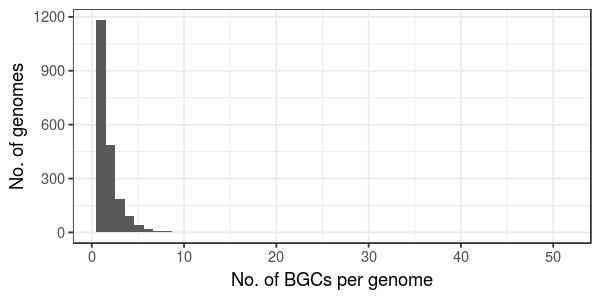

In [37]:
p = products %>%
    group_by(taxon) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() %>%
    ggplot(aes(n_BGCs)) +
    geom_histogram(bins=50) +
    labs(x='No. of BGCs per genome', y='No. of genomes') +
    theme_bw()

dims(5,2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/7f563c4cbf4ddc1b1273d672e234acf7.RDS 


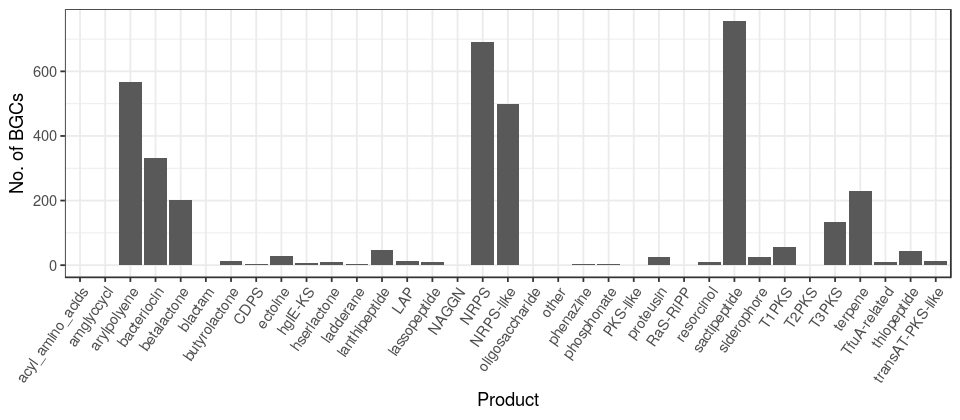

In [38]:
p = products %>%
    mutate(product = product %>% as.character) %>%
    group_by(product) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() %>%
    ggplot(aes(product, n_BGCs)) +
    geom_bar(stat='identity') +
    labs(x='Product', y='No. of BGCs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

dims(8,3.5)
Plot(p)

### by taxonomy

In [39]:
# formatting
products_s = products %>%
    dplyr::select(binID, product, Completeness, Contamination, X..contigs, 
                  Domain, Phylum, Class, Order, Family, Genus, Species,
                  closest_placement_ani) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num,
           has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    group_by(product) %>%
    mutate(n_products = n()) %>%
    ungroup() 

products_s %>% dfhead

[1] 3751   15


binID,product,Completeness,Contamination,X..contigs,Domain,Phylum,Class,Order,Family,Genus,Species,closest_placement_ani,has_species_placement,n_products
artificially_reared_2__maxbin2_low_prob.006.contigs,arylpolyene,88.6,1.11,131,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Paludibacteraceae,g__,s__,0,No match,566
artificially_reared_2__maxbin2_low_prob.006.contigs,arylpolyene,88.6,1.11,131,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Paludibacteraceae,g__,s__,0,No match,566
artificially_reared_2__metabat2_low_PE.017.contigs,bacteriocin,97.6,0.90,18,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__,s__,0,No match,333


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/a08d383195078385cf2394c54dd1039f.RDS 


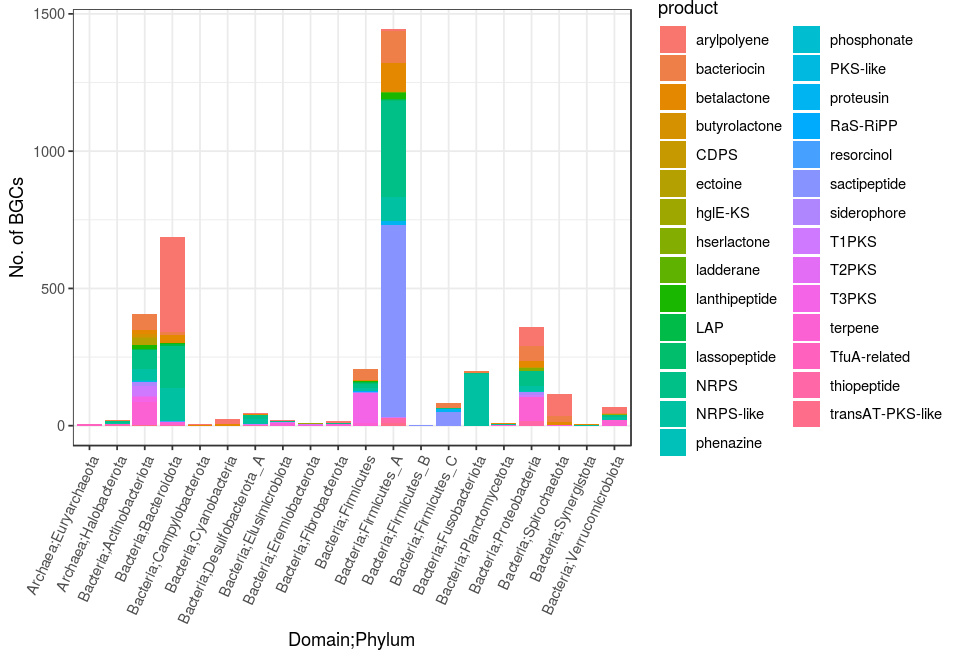

In [40]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Domain;Phylum', y='No. of BGCs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(8,5.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/3bf2f4d4f898c48e401d850dc1d1bedb.RDS 


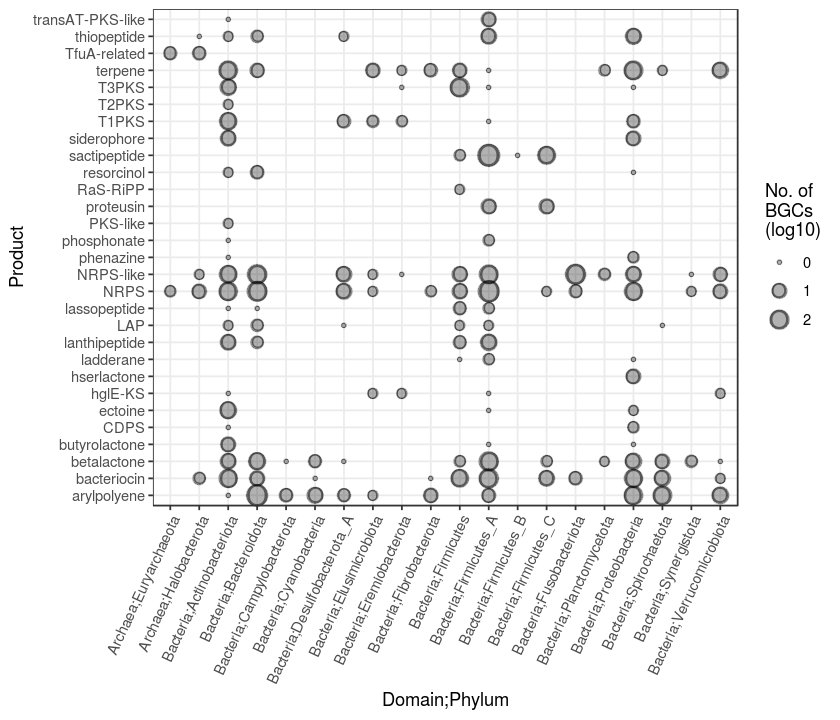

In [41]:
p = products_s_s %>%
    mutate(n_BGCs = n_BGCs %>% log10) %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nBGCs\n(log10)') +
    labs(x='Domain;Phylum', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(7, 6)
Plot(p)

#### Firmicutes

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/039d9f55381c1f998c180ab2413bfd3b.RDS 


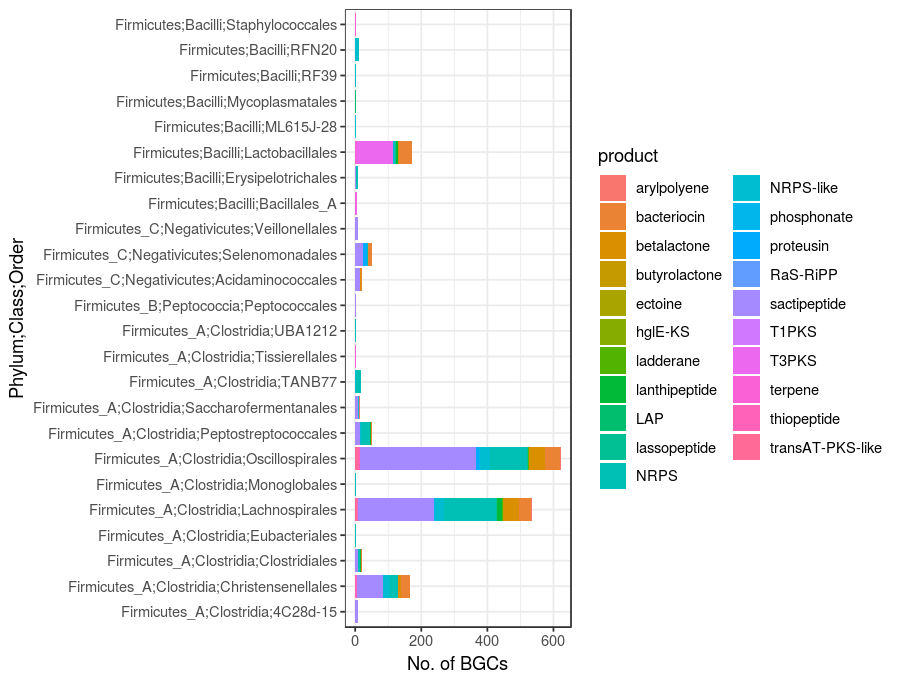

In [43]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    filter(grepl('Firmicutes', Phylum)) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';') %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Class;Order', y='No. of BGCs') +
    coord_flip() +
    theme_bw() 
 
dims(7.5,5.7)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/a9e7fdc9fdcf8f7b1f3c8268d1886f4f.RDS 


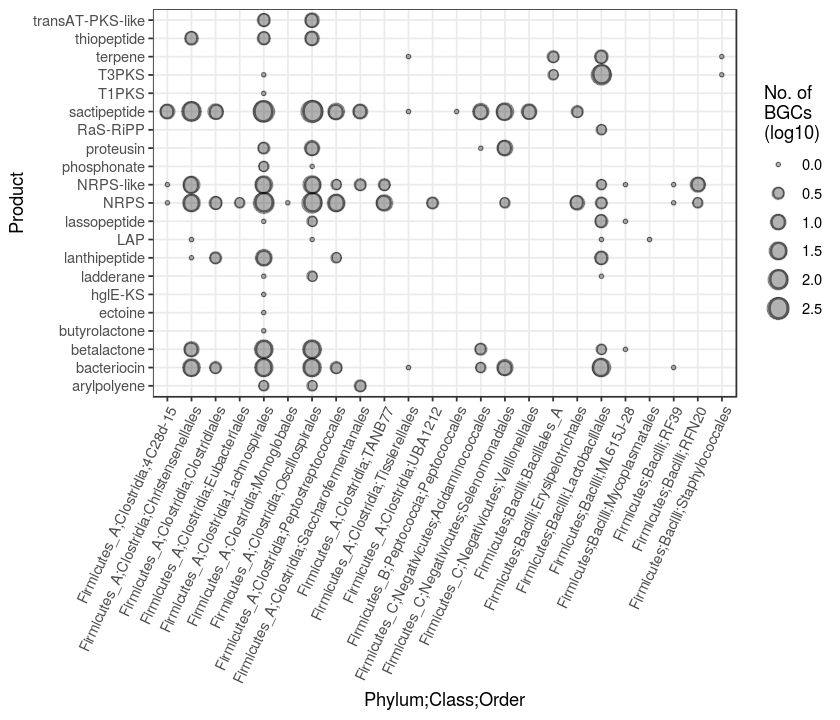

In [44]:
p = products_s_s %>%
    mutate(n_BGCs = n_BGCs %>% log10) %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nBGCs\n(log10)') +
    labs(x='Phylum;Class;Order', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(7, 6)
Plot(p)

### By taxonomy; ave per genome

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/461d9231afc6fd2f009768d2a6528ebc.RDS 


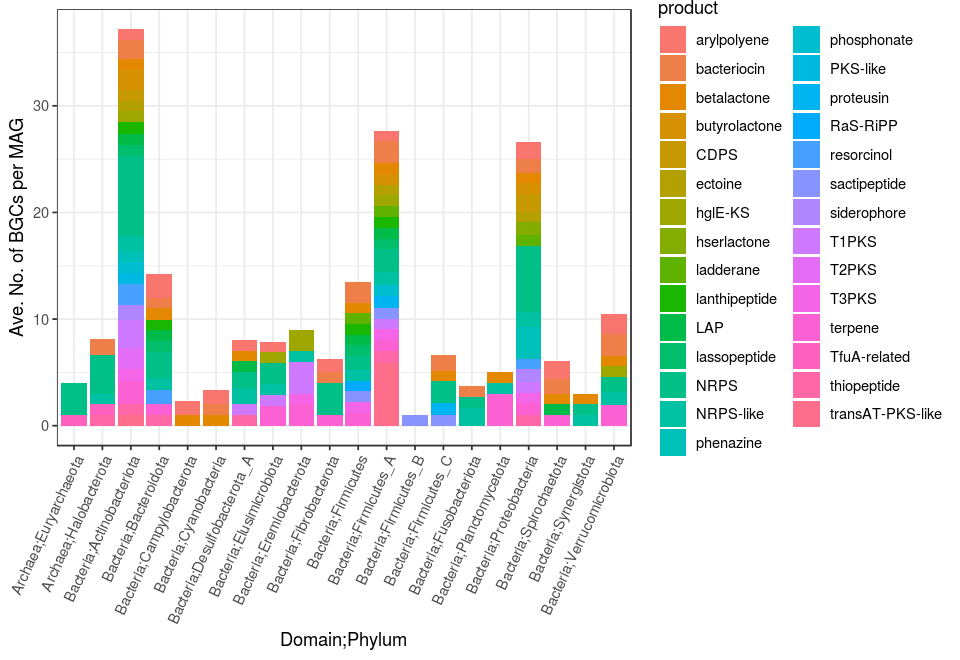

In [45]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') %>%
    group_by(binID, product) %>%
    mutate(n_BGCs = n()) %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = mean(n_BGCs)) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Domain;Phylum', y='Ave. No. of BGCs per MAG') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(8,5.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/af0052891e308a2f5ed1d0db6ce2ecd8.RDS 


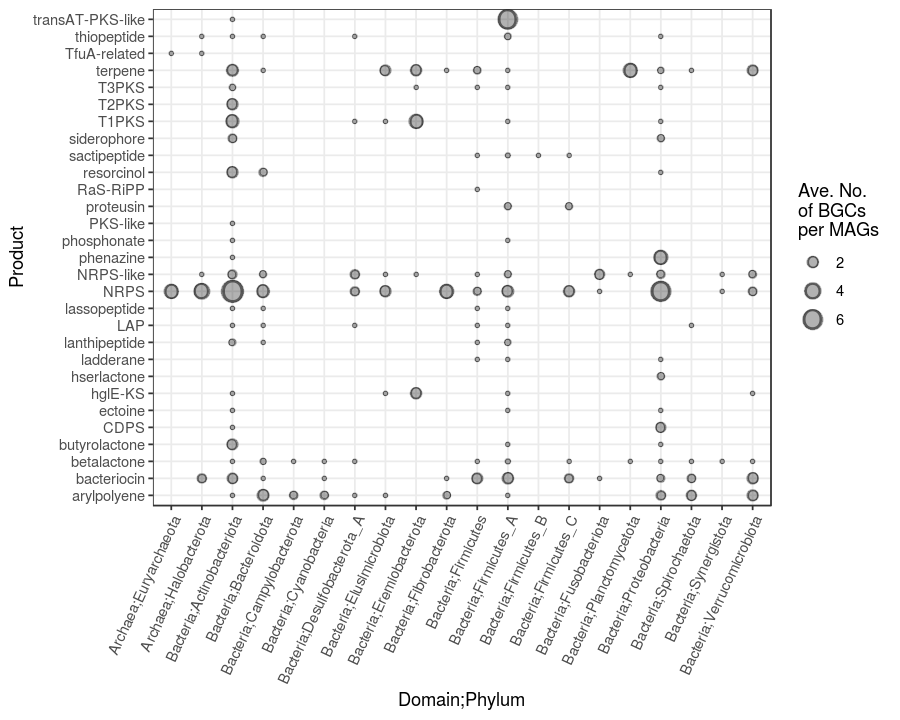

In [46]:
p = products_s_s %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('Ave. No.\nof BGCs\nper MAGs') +
    labs(x='Domain;Phylum', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(7.5, 6)
Plot(p)

#### Highest average per genome

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/d6222b4da5d235fb76765bf3433c5f0c.RDS 


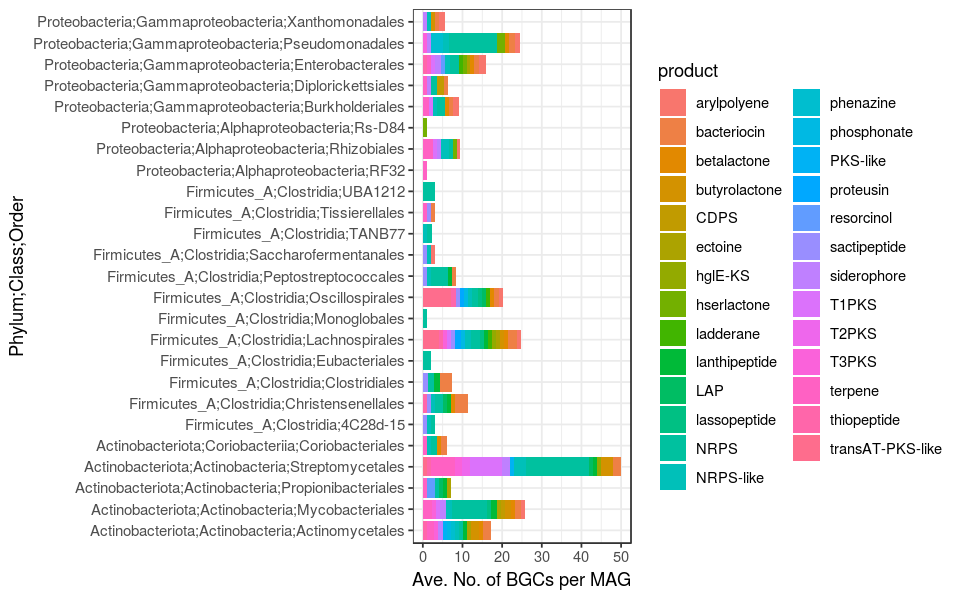

In [47]:
phyla_to_keep = c('Actinobacteriota', 'Firmicutes_A', 'Proteobacteria')

products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    filter(Phylum %in% phyla_to_keep) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(binID, product) %>%
    mutate(n_BGCs = n()) %>%
    group_by(Taxonomy, Phylum, product) %>%
    summarize(n_BGCs = mean(n_BGCs)) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Class;Order', y='Ave. No. of BGCs per MAG') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9)
    )
 
dims(8,5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07_drep99p5_wGeorgAnimal/.figures/16a86f36985f1e7f4a8602b7e6898a4d.RDS 


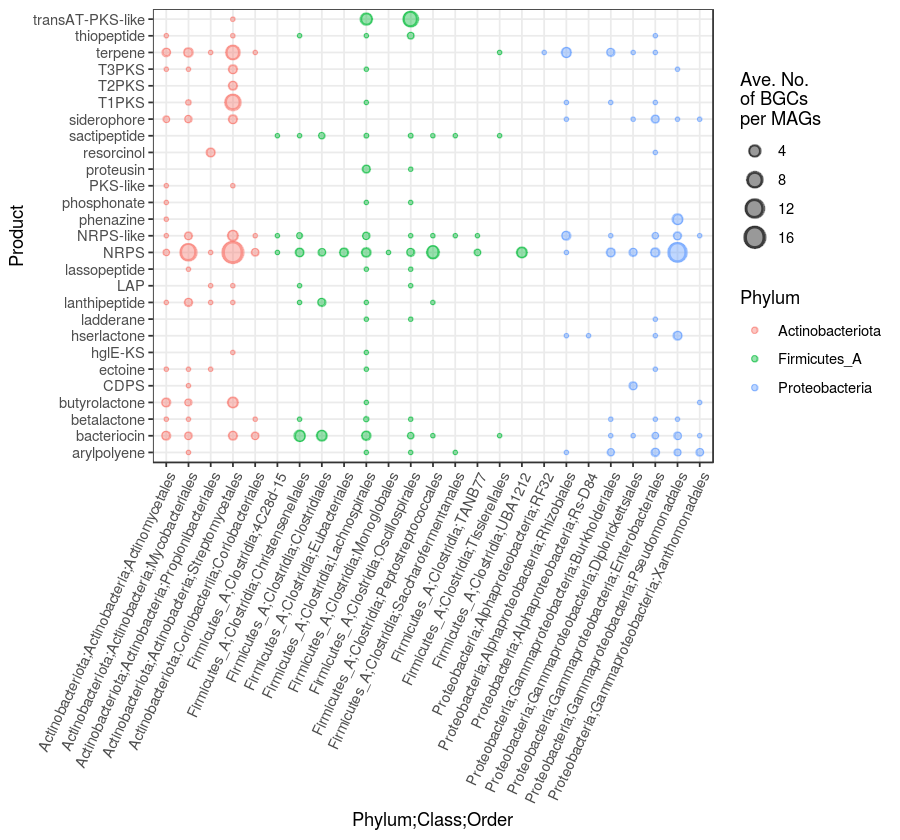

In [48]:
p = products_s_s %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs, color=Phylum)) +
    geom_point(alpha=0.4) +
    geom_point(alpha=0.6, shape='O') +
    scale_size_continuous('Ave. No.\nof BGCs\nper MAGs') +
    labs(x='Phylum;Class;Order', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
dims(7.5,7)
Plot(p)

# DeepBGC

In [49]:
D = file.path(work_dir, 'deepBGC')
make_dir(D)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC 


## First run

In [50]:
deepbgc_cmd = function(in_file, out_dir){
    cmd = 'deepbgc pipeline -p meta --output {out_dir} {in_file}'
    cmd = glue::glue(cmd, out_dir=out_dir, in_file=in_file)
    return(cmd)
}

cmds = mapply(deepbgc_cmd, genome_files$fasta_file, genome_files$dBGC_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 3557


[1] "deepbgc pipeline -p meta --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_001 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa"
[2] "deepbgc pipeline -p meta --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.995/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa"

In [51]:
resources = list(h_rt = '00:59:00',
                 h_vmem = '4G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [53]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 3557

# --WAITING--

* see http://127.0.0.1:9705/notebooks/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/02_antismash-DeepBGC.ipynb

## Re-run failed jobs

In [ ]:
# directories with output
complete = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)

# redo genomes
genome_files_f = genome_files %>%
    filter(!dBGC_out_dir %in% complete)

# status
genome_files_f %>% dfhead

In [ ]:
cmds = mapply(deepbgc_cmd, genome_files_f$fasta_file, genome_files_f$dBGC_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

In [ ]:
resources = list(h_rt = '36:00:00',
                 h_vmem = '8G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [ ]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

#### Notes

* The failed jobs are due to short contigs

## Summary

### Load

In [ ]:
dBGC_files = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', recursive=TRUE, full.names=TRUE)
dBGC_files %>% length %>% print
dBGC_files %>% head(n=2)

In [ ]:
read_dBGC = function(x){
    y = read.delim(x)
    y$taxon = gsub('\\.bgc\\.tsv', '', basename(x))
    return(y)
}

dBGC = lapply(as.list(dBGC_files), read_dBGC) %>%
    do.call(rbind, .) %>%
    dplyr::select(-protein_ids, -pfam_ids, bio_pfam_ids) %>%
    mutate(deepbgc_score = deepbgc_score %>% as.Num)

dBGC %>% dfhead

In [ ]:
# joining with metadata
dBGC = dBGC %>%
    inner_join(genome_files, c('taxon')) 

dBGC %>% dfhead

### Stats

In [ ]:
# number of putative BGCS
for(x in c(0.5, 0.6, 0.7, 0.8, 0.9)){
    n_BGCs = dBGC %>%
        filter(deepbgc_score >= x) %>%
        .$bgc_candidate_id %>% unique %>% length

    cat(glue::glue('Number of BGCs (score >= {score}):', score=x), 
        n_BGCs, '\n')
}

In [ ]:
# deepBGC scores
p = dBGC %>%
    dplyr::select(taxon, nucl_length, deepbgc_score, product_activity) %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red') +
    labs(x='Product/Activity', y='DeepBGC score') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1) 
    )

dims(5,4)
Plot(p)

In [ ]:
# Taxonomy formatting
dBGC_s = dBGC %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') 

dBGC_s %>% dfhead

In [ ]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    dplyr::select(Taxonomy, nucl_length, deepbgc_score, product_activity) %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red', size=0.5) +
    labs(x='Product/Activity', y='DeepBGC score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7,8.5)
Plot(p)

In [ ]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    dplyr::select(Taxonomy, nucl_length, deepbgc_score, product_activity) %>%
    filter(product_activity != '') %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red', size=0.5) +
    labs(x='Product/Activity', y='DeepBGC score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7,8.5)
Plot(p)

### RF scores for each product

In [ ]:
dBGC_s = dBGC %>%
    dplyr::select(bgc_candidate_id, Domain, Phylum, Class, Order, Family, Genus,
                  taxon, nucl_length, deepbgc_score, antibacterial, 
                  cytotoxic, inhibitor, antifungal, product_class, 
                  Alkaloid, NRP, Other, Polyketide, RiPP, Saccharide, Terpene) %>%
    gather(BGC_type, BGC_type_score, -taxon, -nucl_length, -deepbgc_score,
           -Domain, -Phylum, -Class, -Order, -Family, -Genus, -bgc_candidate_id) %>%
    mutate(BGC_type_score = BGC_type_score %>% as.Num) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') 
dBGC_s %>% dfhead

In [ ]:
p = dBGC_s %>%
    filter(BGC_type_score > 0.5) %>%
    ggplot(aes(nucl_length, BGC_type_score, color=deepbgc_score)) +
    geom_point(alpha=0.4) +
    facet_wrap(~ BGC_type) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        legend.position = 'bottom'
    )

dims(9,7)
Plot(p)

In [ ]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    group_by(Taxonomy, BGC_type) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    ggplot(aes(BGC_type, BGC_type_score, color=n)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nBGCs', low='black', high='red') +
    labs(x='BGC type', y='DeepBGC type score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(8,8)
Plot(p)

In [ ]:
# by taxonomy; stringent
p = dBGC_s %>%
    filter(deepbgc_score >= 0.5) %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    group_by(Taxonomy, bgc_candidate_id) %>%
    mutate(max_BGC_type_score = max(BGC_type_score, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(BGC_type_score == max_BGC_type_score) %>%
    group_by(Taxonomy, BGC_type) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(BGC_type_score >= 0.7) %>%
    ggplot(aes(BGC_type, BGC_type_score, color=n)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nBGCs', low='black', high='red') +
    labs(x='BGC type', y='DeepBGC type score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        strip.text = element_text(size=8),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7.5,8)
Plot(p)

# sessionInfo

In [ ]:
condaInfo(conda_env)

In [ ]:
sessionInfo()